# Machine Learning for Data Analysis
### Week 2: Running a Random Forest

The main drawback to a decision tree is that the tree is highly specific to the dataset it was built on; if you bring in new data to try and predict outcomes, you may not find the same high correlations that your decision tree featured. One method to overcome this is with a random forest. Instead of building one tree from your whole dataset, you subset the data randomly and build a number of trees. Each tree will be different, but the relationships between your variables will tend to appear consistently. In general though, because decision trees are intrinsically connected to the specific data they were built with, decision trees are better as a tool to analyze trends within a known dataset than to create a model for predicting the outcomes of future data.

With those caveats, I decided to build a random forest using the same data as from my previous post, that is, a response variable of internet use rate and explanatory variables of income per person, employment rate, female employment rate, and polity score, from the GapMinder dataset.

Load the data, convert the variables to numeric, convert the response variable to binary, and remove NA values.

In [3]:
'''
Code for Peer-graded Assignments: Running a Random Forest
Course: Data Management and Visualization
Specialization: Data Analysis and Interpretation
'''
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
import sklearn.metrics
from sklearn.ensemble import ExtraTreesClassifier
 
data = pd.read_csv('c:/users/greg/desktop/gapminder.csv', low_memory=False)
 
data['internetuserate'] = pd.to_numeric(data['internetuserate'], errors='coerce')
data['incomeperperson'] = pd.to_numeric(data['incomeperperson'], errors='coerce')
data['employrate'] = pd.to_numeric(data['employrate'], errors='coerce')
data['femaleemployrate'] = pd.to_numeric(data['femaleemployrate'], errors='coerce')
data['polityscore'] = pd.to_numeric(data['polityscore'], errors='coerce')
 
binarydata = data.copy()
 
# convert response variable to binary
 
def internetgrp (row):
    if row['internetuserate'] < data['internetuserate'].median():
        return 0
    else:
        return 1

binarydata['internetuserate'] = binarydata.apply (lambda row: internetgrp (row),axis=1)
 
# Clean the dataset
binarydata_clean = binarydata.dropna()

Build the model from the training set

In [10]:
predictors = binarydata_clean[['incomeperperson','employrate','femaleemployrate','polityscore']]
targets = binarydata_clean.internetuserate
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, targets, test_size=.4)

from sklearn.ensemble import RandomForestClassifier

classifier_r=RandomForestClassifier(n_estimators=25)
classifier_r=classifier_r.fit(pred_train,tar_train)
predictions_r=classifier_r.predict(pred_test)

Print the confusion matrix

In [11]:
sklearn.metrics.confusion_matrix(tar_test,predictions_r)

array([[22,  5],
       [10, 24]])

Print the accuracy score

In [12]:
sklearn.metrics.accuracy_score(tar_test, predictions_r)

0.75409836065573765

Fit an Extra Trees model to the data

In [13]:
model_r = ExtraTreesClassifier()
model_r.fit(pred_train,tar_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

Display the Relative Importances of Each Attribute

In [15]:
model_r.feature_importances_

array([ 0.44072852,  0.12553198,  0.1665162 ,  0.2672233 ])

Run a different number of trees and see the effect of that on the accuracy of the prediction

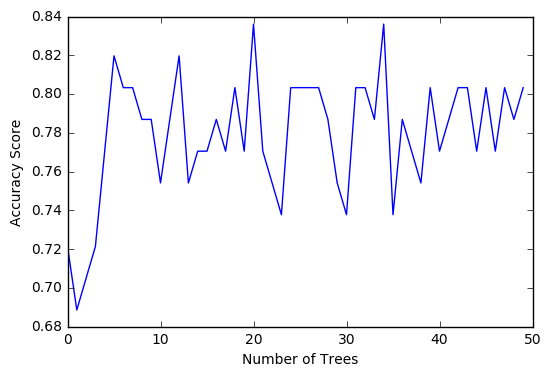

In [16]:
trees=range(50)
accuracy=np.zeros(50)
 
for idx in range(len(trees)):
    classifier_r=RandomForestClassifier(n_estimators=idx + 1)
    classifier_r=classifier_r.fit(pred_train,tar_train)
    predictions_r=classifier_r.predict(pred_test)
    accuracy[idx]=sklearn.metrics.accuracy_score(tar_test, predictions_r)

plt.cla()
plt.plot(trees, accuracy)
plt.ylabel('Accuracy Score')
plt.xlabel('Number of Trees')
plt.show()

The confusion matrix and accuracy score are similar to that of my previous post (remember, a decision tree is pseudo-randomly created, so results will be similar, but not identical, when run with the same dataset). Examining the relative importance of each attribute is interesting here. As expected, income per person is the most highly correlated with internet use rate, at 54% of the model’s predictive capability. Employment rate (15%) and female employment rate (11%) are less correlated, again, as expected. But polity score, at 20% of the model’s predictive capability, stood out to me because none of the previous models I’ve examined with this dataset have had polity score even near the same level of importance as employment rates. Interesting. Finally, the graph shows that as the number of trees in the forest grows, the accuracy of the model does as well, but only up to about 20 trees. After that, the accuracy stops increasing and instead fluctuates with the random permutations of the subsets of data that were used to create the trees.